In [4]:
# Import the modules
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
# Read csv
df = pd.read_csv('/Users/mac/Project-2/transaction_cleaned.csv')
df

,TransactionID,id_01,id_02,id_05,id_06,id_11,id_17,id_19,id_20,isFraud,...,R_emaildomain_web.de,R_emaildomain_windstream.net,R_emaildomain_yahoo.co.jp,R_emaildomain_yahoo.co.uk,R_emaildomain_yahoo.com,R_emaildomain_yahoo.com.mx,R_emaildomain_yahoo.de,R_emaildomain_yahoo.es,R_emaildomain_yahoo.fr,R_emaildomain_ymail.com
0,2987004,0.0,70787.0,NaN,NaN,100.0,166.0,542.0,144.0,0,...,False,False,False,False,False,False,False,False,False,False
1,2987008,-5.0,98945.0,0.0,-5.0,100.0,166.0,621.0,500.0,0,...,False,False,False,False,False,False,False,False,False,False
2,2987010,-5.0,191631.0,0.0,0.0,100.0,121.0,410.0,142.0,0,...,False,False,False,False,False,False,False,False,False,False
3,2987011,-5.0,221832.0,0.0,-6.0,100.0,225.0,176.0,507.0,0,...,False,False,False,False,False,False,False,False,False,False
4,2987016,0.0,7460.0,1.0,0.0,100.0,166.0,529.0,575.0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,3065904,-5.0,115546.0,0.0,-3.0,100.0,166.0,352.0,222.0,0,...,False,False,False,False,True,False,False,False,False,False
29996,3065905,0.0,12458.0,0.0,0.0,100.0,166.0,312.0,214.0,0,...,False,False,False,False,False,False,False,False,False,False
29997,3065908,0.0,19909.0,0.0,0.0,100.0,166.0,312.0,214.0,0,...,False,False,False,False,False,False,False,False,False,False
29998,3065910,0.0,108063.0,23.0,-13.0,100.0,166.0,263.0,222.0,0,...,False,False,False,False,False,False,False,False,False,False


In [6]:
# Check df with NaN filled with mean
df_mean = df.fillna(df.mean())
df_mean

,TransactionID,id_01,id_02,id_05,id_06,id_11,id_17,id_19,id_20,isFraud,...,R_emaildomain_web.de,R_emaildomain_windstream.net,R_emaildomain_yahoo.co.jp,R_emaildomain_yahoo.co.uk,R_emaildomain_yahoo.com,R_emaildomain_yahoo.com.mx,R_emaildomain_yahoo.de,R_emaildomain_yahoo.es,R_emaildomain_yahoo.fr,R_emaildomain_ymail.com
0,2987004,0.0,70787.0,1.941549,-5.952324,100.0,166.0,542.0,144.0,0,...,False,False,False,False,False,False,False,False,False,False
1,2987008,-5.0,98945.0,0.000000,-5.000000,100.0,166.0,621.0,500.0,0,...,False,False,False,False,False,False,False,False,False,False
2,2987010,-5.0,191631.0,0.000000,0.000000,100.0,121.0,410.0,142.0,0,...,False,False,False,False,False,False,False,False,False,False
3,2987011,-5.0,221832.0,0.000000,-6.000000,100.0,225.0,176.0,507.0,0,...,False,False,False,False,False,False,False,False,False,False
4,2987016,0.0,7460.0,1.000000,0.000000,100.0,166.0,529.0,575.0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,3065904,-5.0,115546.0,0.000000,-3.000000,100.0,166.0,352.0,222.0,0,...,False,False,False,False,True,False,False,False,False,False
29996,3065905,0.0,12458.0,0.000000,0.000000,100.0,166.0,312.0,214.0,0,...,False,False,False,False,False,False,False,False,False,False
29997,3065908,0.0,19909.0,0.000000,0.000000,100.0,166.0,312.0,214.0,0,...,False,False,False,False,False,False,False,False,False,False
29998,3065910,0.0,108063.0,23.000000,-13.000000,100.0,166.0,263.0,222.0,0,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 508 entries, TransactionID to R_emaildomain_ymail.com
dtypes: bool(279), float64(225), int64(4)
memory usage: 60.4 MB


In [8]:
df_med = df.fillna(df.median())
df_med

,TransactionID,id_01,id_02,id_05,id_06,id_11,id_17,id_19,id_20,isFraud,...,R_emaildomain_web.de,R_emaildomain_windstream.net,R_emaildomain_yahoo.co.jp,R_emaildomain_yahoo.co.uk,R_emaildomain_yahoo.com,R_emaildomain_yahoo.com.mx,R_emaildomain_yahoo.de,R_emaildomain_yahoo.es,R_emaildomain_yahoo.fr,R_emaildomain_ymail.com
0,2987004,0.0,70787.0,0.0,0.0,100.0,166.0,542.0,144.0,0,...,False,False,False,False,False,False,False,False,False,False
1,2987008,-5.0,98945.0,0.0,-5.0,100.0,166.0,621.0,500.0,0,...,False,False,False,False,False,False,False,False,False,False
2,2987010,-5.0,191631.0,0.0,0.0,100.0,121.0,410.0,142.0,0,...,False,False,False,False,False,False,False,False,False,False
3,2987011,-5.0,221832.0,0.0,-6.0,100.0,225.0,176.0,507.0,0,...,False,False,False,False,False,False,False,False,False,False
4,2987016,0.0,7460.0,1.0,0.0,100.0,166.0,529.0,575.0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,3065904,-5.0,115546.0,0.0,-3.0,100.0,166.0,352.0,222.0,0,...,False,False,False,False,True,False,False,False,False,False
29996,3065905,0.0,12458.0,0.0,0.0,100.0,166.0,312.0,214.0,0,...,False,False,False,False,False,False,False,False,False,False
29997,3065908,0.0,19909.0,0.0,0.0,100.0,166.0,312.0,214.0,0,...,False,False,False,False,False,False,False,False,False,False
29998,3065910,0.0,108063.0,23.0,-13.0,100.0,166.0,263.0,222.0,0,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df_med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 508 entries, TransactionID to R_emaildomain_ymail.com
dtypes: bool(279), float64(225), int64(4)
memory usage: 60.4 MB


In [10]:
#Review data 
df_mean.dtypes

TransactionID                   int64
id_01                         float64
id_02                         float64
id_05                         float64
id_06                         float64
                               ...   
R_emaildomain_yahoo.com.mx       bool
R_emaildomain_yahoo.de           bool
R_emaildomain_yahoo.es           bool
R_emaildomain_yahoo.fr           bool
R_emaildomain_ymail.com          bool
Length: 508, dtype: object

In [11]:
X = df_mean.drop(columns=('isFraud'))
X

,TransactionID,id_01,id_02,id_05,id_06,id_11,id_17,id_19,id_20,TransactionDT,...,R_emaildomain_web.de,R_emaildomain_windstream.net,R_emaildomain_yahoo.co.jp,R_emaildomain_yahoo.co.uk,R_emaildomain_yahoo.com,R_emaildomain_yahoo.com.mx,R_emaildomain_yahoo.de,R_emaildomain_yahoo.es,R_emaildomain_yahoo.fr,R_emaildomain_ymail.com
0,2987004,0.0,70787.0,1.941549,-5.952324,100.0,166.0,542.0,144.0,86506,...,False,False,False,False,False,False,False,False,False,False
1,2987008,-5.0,98945.0,0.000000,-5.000000,100.0,166.0,621.0,500.0,86535,...,False,False,False,False,False,False,False,False,False,False
2,2987010,-5.0,191631.0,0.000000,0.000000,100.0,121.0,410.0,142.0,86549,...,False,False,False,False,False,False,False,False,False,False
3,2987011,-5.0,221832.0,0.000000,-6.000000,100.0,225.0,176.0,507.0,86555,...,False,False,False,False,False,False,False,False,False,False
4,2987016,0.0,7460.0,1.000000,0.000000,100.0,166.0,529.0,575.0,86620,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,3065904,-5.0,115546.0,0.000000,-3.000000,100.0,166.0,352.0,222.0,1714130,...,False,False,False,False,True,False,False,False,False,False
29996,3065905,0.0,12458.0,0.000000,0.000000,100.0,166.0,312.0,214.0,1714143,...,False,False,False,False,False,False,False,False,False,False
29997,3065908,0.0,19909.0,0.000000,0.000000,100.0,166.0,312.0,214.0,1714171,...,False,False,False,False,False,False,False,False,False,False
29998,3065910,0.0,108063.0,23.000000,-13.000000,100.0,166.0,263.0,222.0,1714197,...,False,False,False,False,False,False,False,False,False,False


In [12]:
# Define target(y)
y = df_mean['isFraud']
y

0        0
1        0
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    0
29998    0
29999    0
Name: isFraud, Length: 30000, dtype: int64

In [13]:
# Import train test split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Apply train_test_split to data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [14]:
# Display X_train
X_train

,TransactionID,id_01,id_02,id_05,id_06,id_11,id_17,id_19,id_20,TransactionDT,...,R_emaildomain_web.de,R_emaildomain_windstream.net,R_emaildomain_yahoo.co.jp,R_emaildomain_yahoo.co.uk,R_emaildomain_yahoo.com,R_emaildomain_yahoo.com.mx,R_emaildomain_yahoo.de,R_emaildomain_yahoo.es,R_emaildomain_yahoo.fr,R_emaildomain_ymail.com
26340,3058857,-10.0,101528.0,0.0,0.0,100.0,225.0,607.0,561.0,1614571,...,False,False,False,False,False,True,False,False,False,False
3877,3003670,-5.0,155753.0,3.0,-15.0,100.0,166.0,352.0,549.0,439467,...,False,False,False,False,False,False,False,False,False,False
27081,3060191,-5.0,112419.0,0.0,0.0,100.0,225.0,427.0,595.0,1626380,...,False,False,False,False,False,False,False,False,False,False
5440,3008642,-5.0,32818.0,17.0,-26.0,100.0,166.0,337.0,214.0,573478,...,False,False,False,False,False,False,False,False,False,False
22164,3050162,-5.0,149155.0,0.0,0.0,100.0,225.0,266.0,507.0,1442481,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17289,3039159,-5.0,51460.0,0.0,0.0,100.0,166.0,410.0,484.0,1217601,...,False,False,False,False,False,False,False,False,False,False
5192,3007951,0.0,143975.0,0.0,0.0,100.0,225.0,266.0,305.0,533254,...,False,False,False,False,False,False,False,False,False,False
12172,3026801,-5.0,25811.0,0.0,0.0,100.0,166.0,312.0,222.0,965018,...,False,False,False,False,False,False,False,False,False,False
235,2987779,-5.0,4235.0,0.0,0.0,100.0,166.0,397.0,161.0,102154,...,False,False,False,False,False,False,False,False,False,False


In [15]:
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 508 entries, TransactionID to R_emaildomain_ymail.com
dtypes: bool(279), float64(225), int64(4)
memory usage: 60.4 MB


In [16]:
nan_data = X_train.isnull().sum()
print(nan_data)

TransactionID                 0
id_01                         0
id_02                         0
id_05                         0
id_06                         0
                             ..
R_emaildomain_yahoo.com.mx    0
R_emaildomain_yahoo.de        0
R_emaildomain_yahoo.es        0
R_emaildomain_yahoo.fr        0
R_emaildomain_ymail.com       0
Length: 507, dtype: int64


In [17]:
#Display X_test
X_test

,TransactionID,id_01,id_02,id_05,id_06,id_11,id_17,id_19,id_20,TransactionDT,...,R_emaildomain_web.de,R_emaildomain_windstream.net,R_emaildomain_yahoo.co.jp,R_emaildomain_yahoo.co.uk,R_emaildomain_yahoo.com,R_emaildomain_yahoo.com.mx,R_emaildomain_yahoo.de,R_emaildomain_yahoo.es,R_emaildomain_yahoo.fr,R_emaildomain_ymail.com
10747,3023360,-5.0,107315.0,10.0,-100.0,100.000000,166.0,122.0,597.0,884102,...,False,False,False,False,False,False,False,False,False,False
12573,3027744,-5.0,115929.0,1.0,0.0,95.699997,166.0,100.0,500.0,1007838,...,False,False,False,False,False,False,False,False,False,False
29676,3065336,-5.0,999074.0,14.0,-3.0,100.000000,166.0,410.0,489.0,1708553,...,False,False,False,False,True,False,False,False,False,False
8856,3018476,-5.0,491439.0,6.0,-1.0,100.000000,166.0,621.0,394.0,776038,...,False,False,False,False,False,False,False,False,False,False
21098,3047848,-5.0,270660.0,5.0,0.0,100.000000,166.0,410.0,222.0,1379465,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29317,3064677,-5.0,61467.0,0.0,-6.0,100.000000,166.0,193.0,535.0,1702722,...,False,False,False,False,False,False,False,False,False,False
18629,3042169,-5.0,163791.0,0.0,0.0,100.000000,225.0,290.0,401.0,1285211,...,False,False,False,False,False,False,False,False,False,False
15329,3034394,-10.0,119772.0,0.0,-8.0,100.000000,202.0,410.0,435.0,1122690,...,False,False,False,False,False,False,False,False,False,False
14587,3032586,0.0,89899.0,0.0,0.0,100.000000,166.0,542.0,333.0,1099280,...,False,False,False,False,False,False,False,False,False,False


In [18]:
# Check the number of fraud vs. not fraud('isFraud')
# using value_counts
df_mean['isFraud'].value_counts()

isFraud
0    28869
1     1131
Name: count, dtype: int64

In [19]:
# Import `LogisticRegression` from sklearn
from sklearn.linear_model import LogisticRegression

In [20]:
# Create a `LogisticRegression` function to lr_model 
lr_model = LogisticRegression()

In [21]:
# fit train data to LogisticRegression model
lr_model.fit(X_train, y_train)


/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
# Print the logistic regression Train and Test
print(f"Logistic Regression Training data :{lr_model.score(X_train, y_train)}")
print(f"Logistic Regression Training data :{lr_model.score(X_test, y_test)}")

Logistic Regression Training data :0.9623555555555555
Logistic Regression Training data :0.9632


In [23]:
# Create Prediction based on the Logistic Regression model we fit
predictions = lr_model.predict(X_train)
# Convert and display predictions vs actual data to a DataFrame
fraud_results_df = pd.DataFrame({"Prediction": predictions, "Actual": y_train})
fraud_results_df

,Prediction,Actual
26340,0,0
3877,0,0
27081,0,0
5440,0,0
22164,0,0
...,...,...
17289,0,0
5192,0,0
12172,0,0
235,0,1


In [24]:
# Predictions applied to testing data
test_predictions = lr_model.predict(X_test)

# Convert and display predictions vs actual data of test data to DF

fraud_test_result = pd.DataFrame({ "Test Predictions":test_predictions, "Actual": y_test})
fraud_test_result

,Test Predictions,Actual
10747,0,0
12573,0,0
29676,0,0
8856,0,1
21098,0,0
...,...,...
29317,0,0
18629,0,0
15329,0,0
14587,0,0


In [25]:
# Import the accuracy_score function
from sklearn.metrics import accuracy_score




In [26]:
# Calculate the model accuracy score using y_test and testing 
accuracy_score= accuracy_score(y_test, test_predictions)
print(f"Your accuracy score for the model is: {accuracy_score}")

Your accuracy score for the model is: 0.9632


In [27]:
# Load imports for use of RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [28]:
# Scale data 
# Scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# Apply RandomForest classifier
forest = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)

# evaluate the model
print(f'Training Score: {forest.score(X_train_scaled, y_train)}')
print(f'Testing Score: {forest.score(X_test_scaled, y_test)}')



Training Score: 1.0
Testing Score: 0.9802666666666666


In [30]:
# Get the feature importance array
feature_importances = forest.feature_importances_

In [31]:
# List the top 10 most important features
importances_sorted = sorted(zip(feature_importances, X.columns), reverse=True)
importances_sorted[:10]

[(0.02705862907568965, 'C1'),
 (0.02146784376160067, 'TransactionDT'),
 (0.021311256398918302, 'TransactionID'),
 (0.02091209485301454, 'id_02'),
 (0.01901132329607271, 'TransactionAmt'),
 (0.017397628586497415, 'C11'),
 (0.01722109760499898, 'card1'),
 (0.01709718271331053, 'C13'),
 (0.016384038068757392, 'V189'),
 (0.016242086462517572, 'C12')]

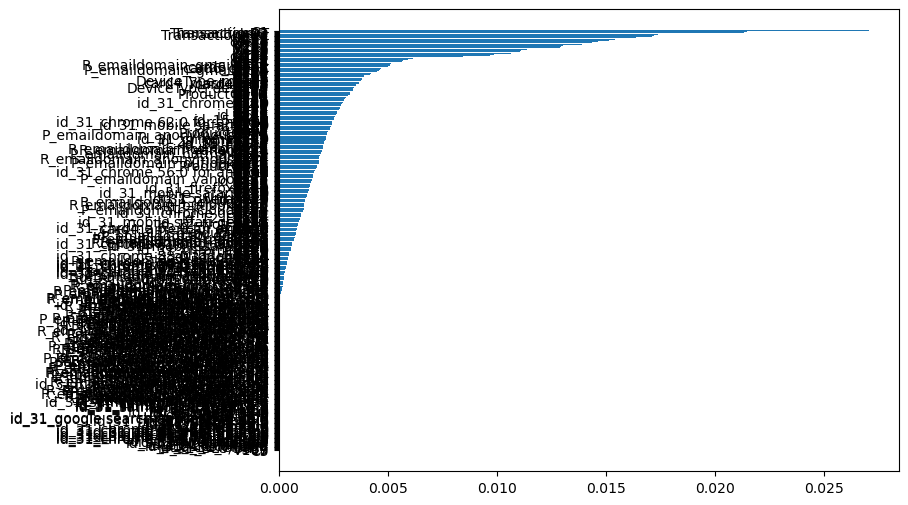

In [39]:
#import matplot
from matplotlib import pyplot as plt
 #Plot the feature importances
features = sorted(zip(X.columns, feature_importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(8,6)
plt.margins(y=0.05)

ax.barh(y=cols, width=width)

plt.show()

